In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

<class 'numpy.ndarray'> (240, 320)


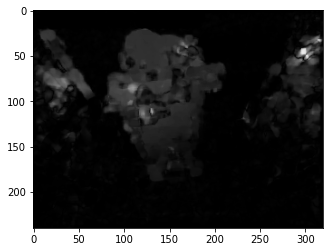

In [11]:
feature_params = dict(maxCorners = 300, qualityLevel = 0.2, minDistance = 2, blockSize = 7)
lk_params = dict(winSize = (15,15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# cap = cv2.VideoCapture("trial1.avi")
color = (0, 255, 0)
# ret, first_frame = cap.read()
first_frame = cv2.imread("images/trial1/frame0.jpg")
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
prev = cv2.goodFeaturesToTrack(prev_gray, mask = None, **feature_params)
mask = np.zeros_like(first_frame)

r=0
for i in range(1,125):
    frame = cv2.imread("images/trial1/frame"+ str(i)+".jpg")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = gray.copy()
    prev = cv2.goodFeaturesToTrack(prev_gray, mask = None, **feature_params)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 1, 5, 2, 5, 1.1, None)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    plt.imshow(mag, cmap='gray')
    print(type(mag), mag.shape)
    break
    good_old = prev[status == 1].astype(int)
    good_new = next[status == 1].astype(int)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d), color, 2)
        frame = cv2.circle(frame, (a, b), 3, color, -1)
    output = cv2.add(frame, mask)
    prev_gray = gray.copy()
    prev = good_new.reshape(-1, 1, 2)
    mask = np.zeros_like(frame)
    plt.imsave('images/output_trial1/frame'+ str(r)+'.jpg',output)
    r += 1